# A figure in 10 pieces

Customization is the power as well as the challenge of using `matplotlib` for visualization. There is so much that can be customized, but most customizations require adding additional code, and additional code means additional time. Understanding all of the pieces of a plot and how to adjust them takes time.

As a starting point, we'll walk through 10 components of most figures and demonstrate how they can be customized. The pieces we'll explore are listed in the following table. Don't worry - we'll demonstrate them one step at a time and build up a figure which uses them all.

Let's start with the final product with every item included and then walk through how to develop that figure.

![Anatomy of a Figure](img/5.1-anatomy-figure.png)

**Table 1. Core components of most plots in `matplotlib`**

| Plot component | Purpose | Example of code to add or create the component |
|---|---|---|
| Figure | The container for one or more sets of axes on which plots are built | `fig, ax = plt.subplots()` |
| Axes | A canvas on which plotting happens | `fig, ax = plt.subplots()` |
| Line | Plot representing a series of connected points | `ax.plot(x,y)` |
| Markers | Plot representing a point in a dataset | `ax.scatter(x,y, marker='s', markerfacecolor='lightgrey)` |
| x/y-axis label | Label for the x/y axis | `ax.set_xlabel("My x-label")` (`x` can be swapped for `y`) |
| x/y-axis ticks | Tick locations for the x axis | `ax.set_xtick([List of x tick locations])` (`x` can be swapped for `y`) |
| x/y-axis tick labels | Tick locations for the x axis | `ax.set_xticklabels([List of x tick labels])` (`x` can be swapped for `y`) |
| x/y-axis limits | Max and min value for the x/y axis | `ax.set_xlim([first,last])` (`x` can be swapped for `y`) |
| Grid | Grid line to appear behind the plot | `ax.grid(True)` |
| Legend | Figure legend containing lines, markers, or other symbology | `ax.legend(loc="upper right")` |
| Title | Title of the figure | `ax.set_title("My Title")`|
| Spines | The lines that make up the outer edge of the axes | `ax.spines[['right', 'top']].set_visible(False)` (this turns off the top and right spines, for example)|

Before we begin, let's create some toy data for us to work with. We'll create variables `y_model` and `y_data` which represent some data and a model for those data.

In [1]:
import numpy as np

# Create noise-free data
maxval = 2*np.pi
x_model = np.linspace(0,maxval,1000)
f = lambda x: np.sin(x)*x
y_model = f(x_model)

# Create noisy data
x_data = np.random.rand(25)*maxval
y_data = f(x_data) + np.random.randn(*x_data.shape)*0.5

## 1. Figures and axes

Every plot is composed of a few key pieces: the figure, which contains one or more axes, and the axes themselves, onto which you can add plots that share the same axes. This is created for you with the `fig, ax = plt.subplots()` command, where `fig` is your figure object and `ax` is your axes object. But what is a figure and what are axes and how are they different? You can think about a figure as a page in a scrap book - it's a place to hold all the interesting things you're about to add to it. You are mainly going to care about how big it is so you can determine whether it will fit the items you want to add to the page. Axes are like the photos you may add to the pages of a scrap book. Axes are the photographs that you add to the scrap book. You might have one big photo that will take up the whole page, or a number of smaller photos that you want to display together. These are your axes. We perform all of our plotting on the axes, NOT on the figure. We can plot multiple things on an axes (lines and points, etc.), but they collectively form one axes object.

We'll create this and an axis on which to plot using the `subplots()` method. Since we're already familiar with this structure for explicit plotting syntax, we'll add one customization which will be to make the size of the figure larger to accommodate a more complex figure that we'll be building. We'll make the figure 7 inches wide by 7 inches tall. We'll also plot our data. We'll plot `y_model` as a line plot and `y_data` as a scatter plot.

In [2]:
# Optional command to make the figures high resolution
%config InlineBackend.figure_format = 'retina'

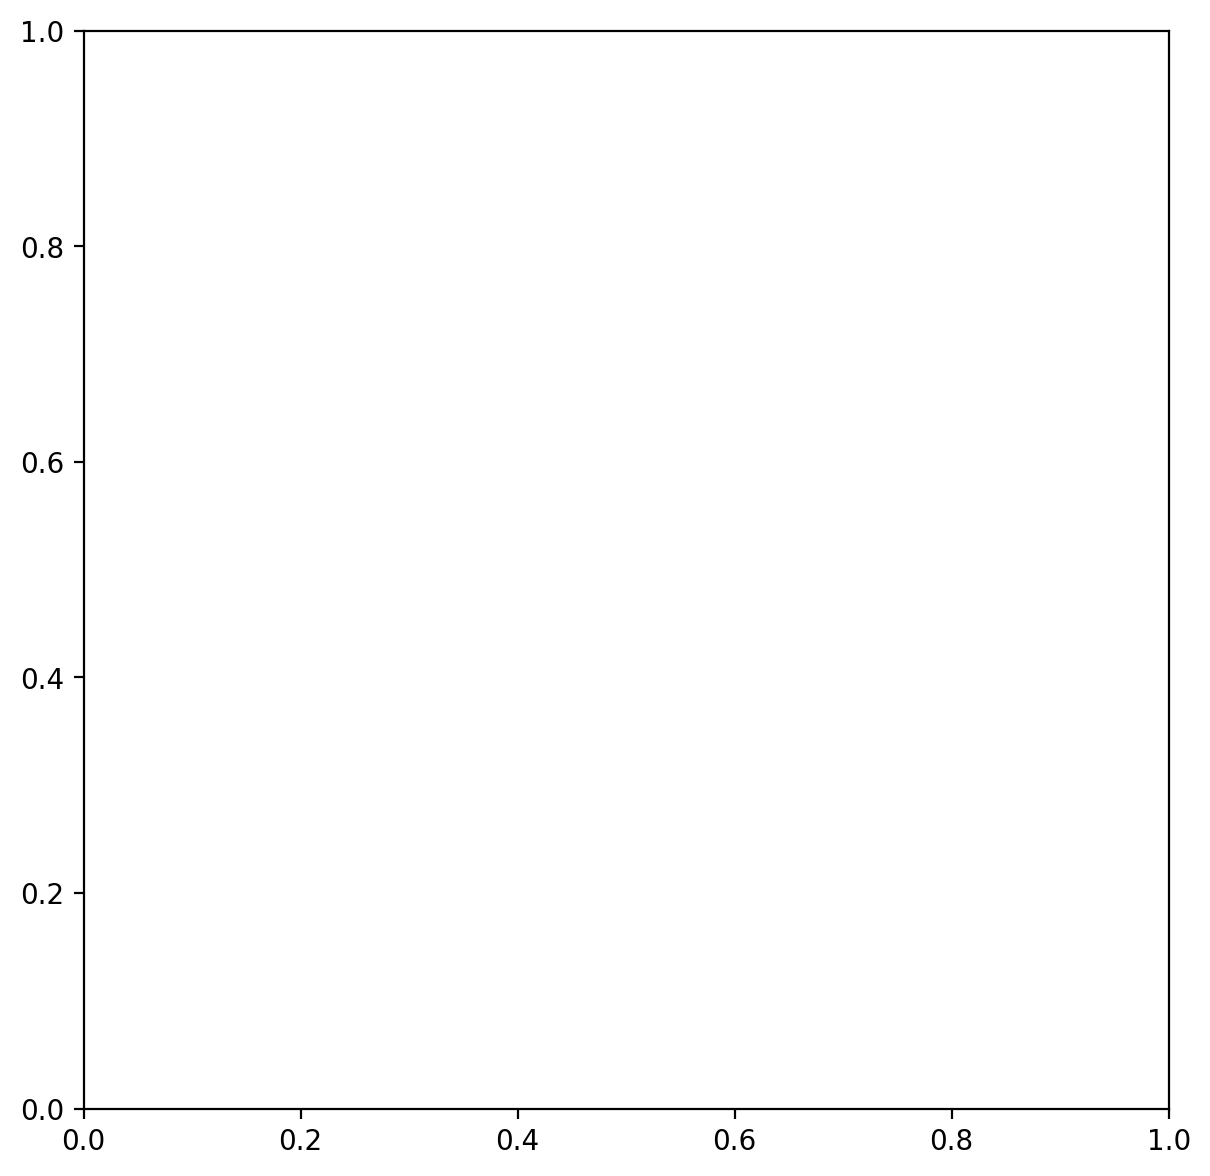

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
plt.show()

## 2. Line and scatter plots

Plotting lines in matplotlib allows for significant amounts of customizations, which we'll discuss a bit later, For now, let's simply create a line plot of `y_model` and a scatter plot of `y_data`. We'll adjust the scatter plot color to be black to make sure it's distinguishable from the blue line of `y_model`.

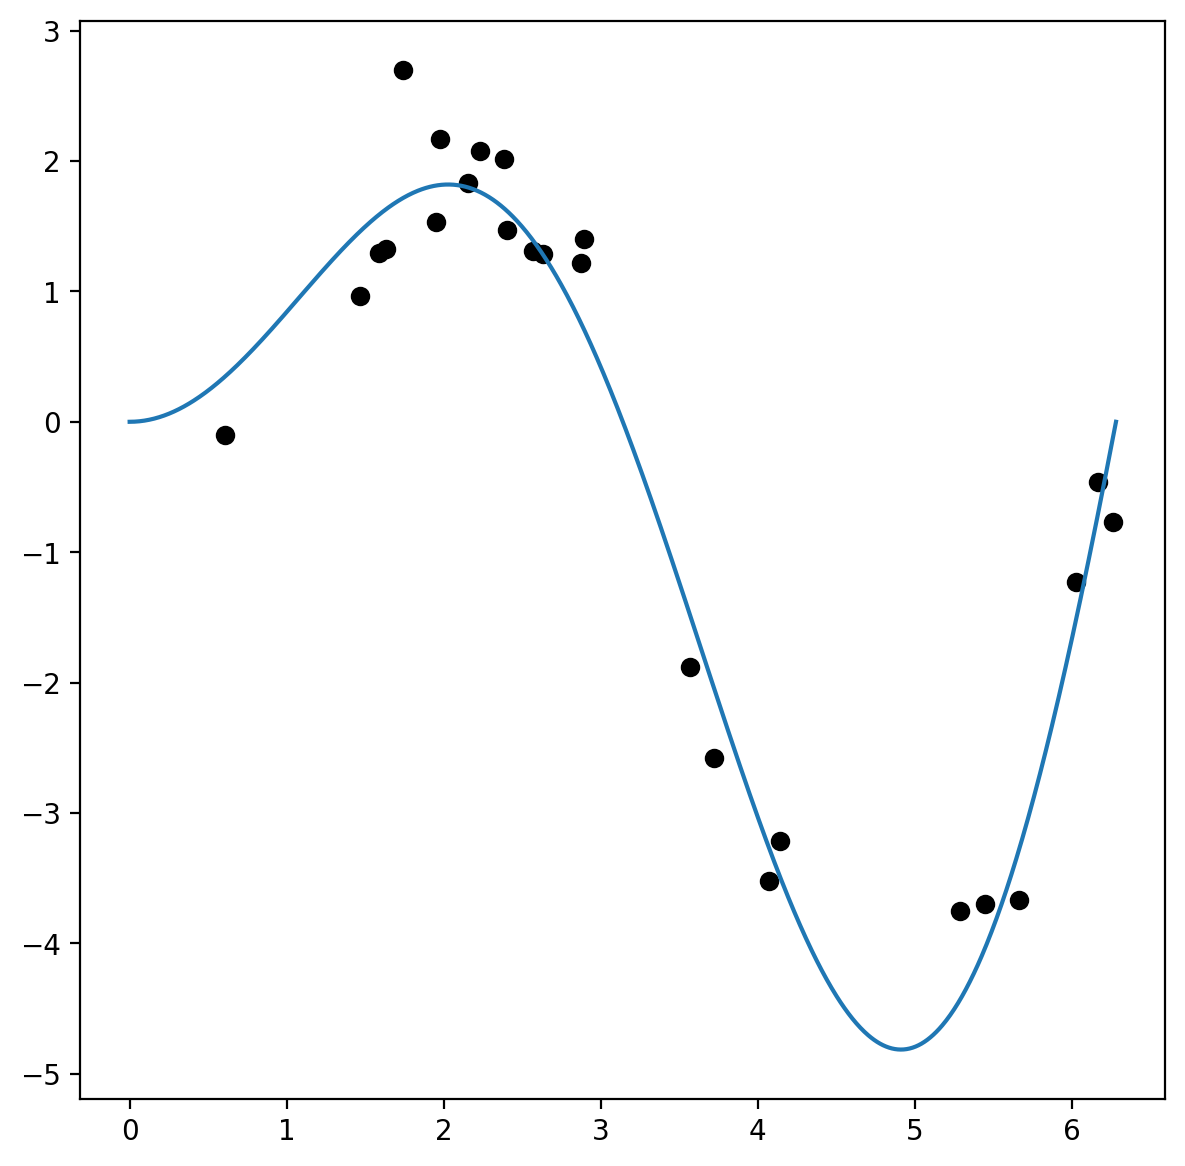

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_model,y_model)
ax.scatter(x_data,y_data,color='black')
plt.show()

## 3. Axis labels

The next things to add to any good plot are the axis labels so we know the content we're plotting. Let's label these simply `x` and `y`.

*Note: for those familiar with Latex typesetting, you can use latex in axis labels, tick labels, titles, legend entries, etc., by enclosing the latex in dollar signs (e.g. `$\pi$`). To do this, you need to set the following parameter: `plt.rcParams['text.usetex'] = True`*.

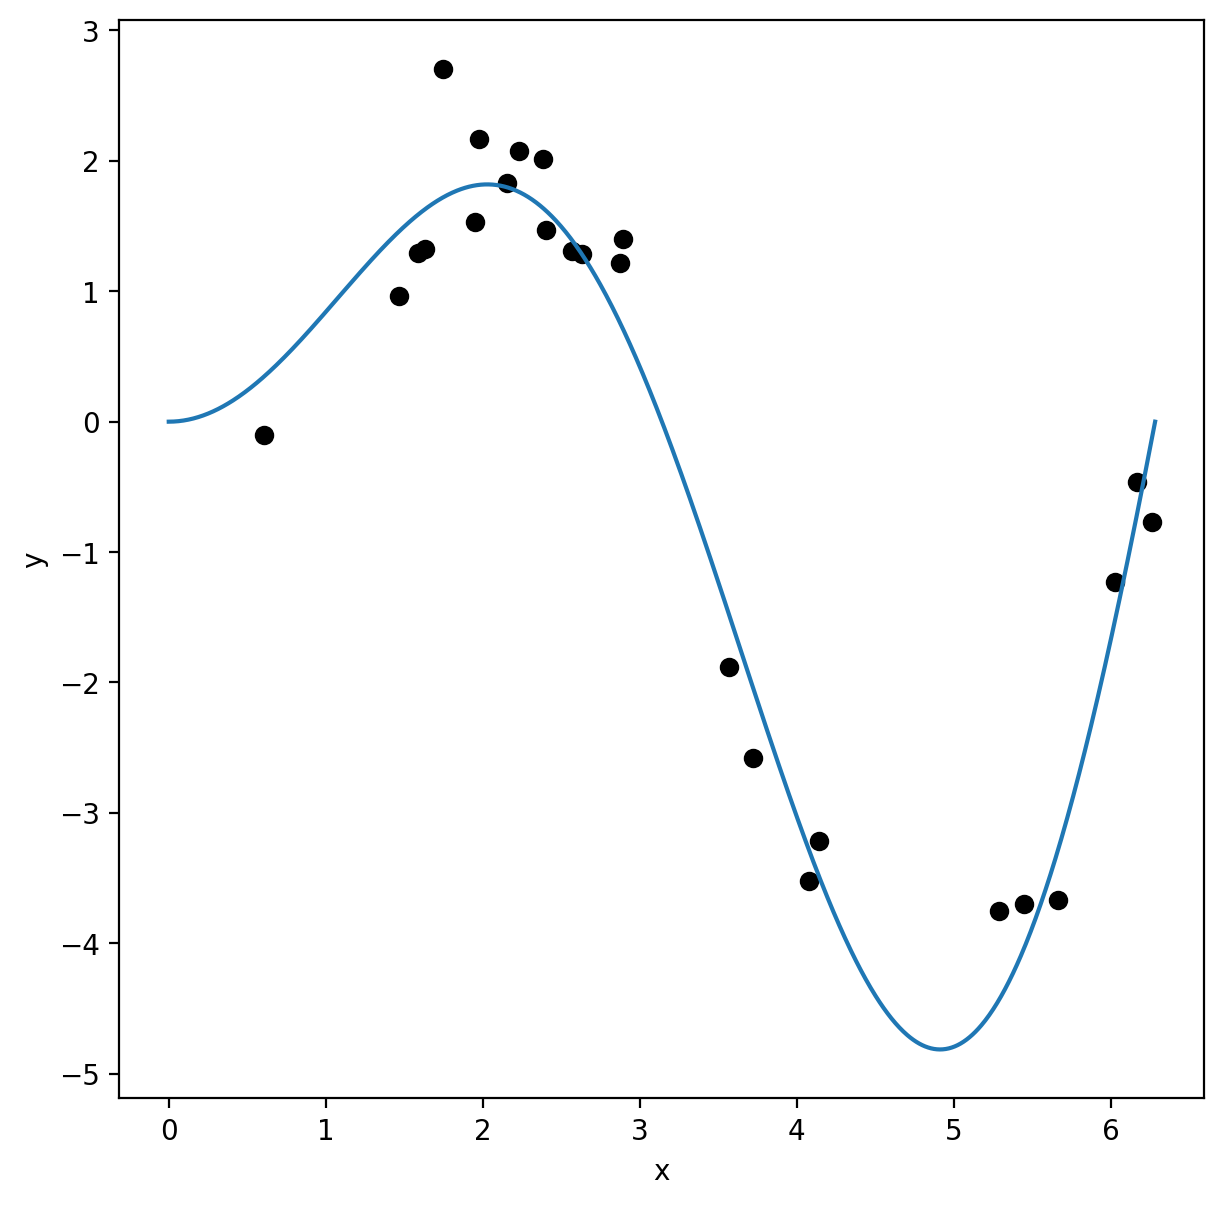

In [5]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_model,y_model)
ax.scatter(x_data,y_data,color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## 4 and 5. Ticks and tick labels

Sometimes we want to customize the locations of ticks on a plot or even how the data are labeled. For the y-axis, let's make the ticks be every 2 units from -6 to 4. In this case, the x-axis for our plot covers the range 0 to $2\pi$, where $\pi \approx 3.14$. Here, we want ticks at the locations $[0, \pi/2, \pi, \frac{3}{2}\pi, 2\pi]$, in units of radians. Let's say we want to represent this by labeling the axes in units of degrees instead. In that case, $\pi$ radians is 180 degrees, so the number of degrees that represent each of the above units is $[0, 90, 180, 270, 360]$. Now, let's update our plot accordingly and label the units of the x-axis as degrees.

Below, we'll state the labels ONLY for the axis since we want the y-axis to use the numbers we assigned.

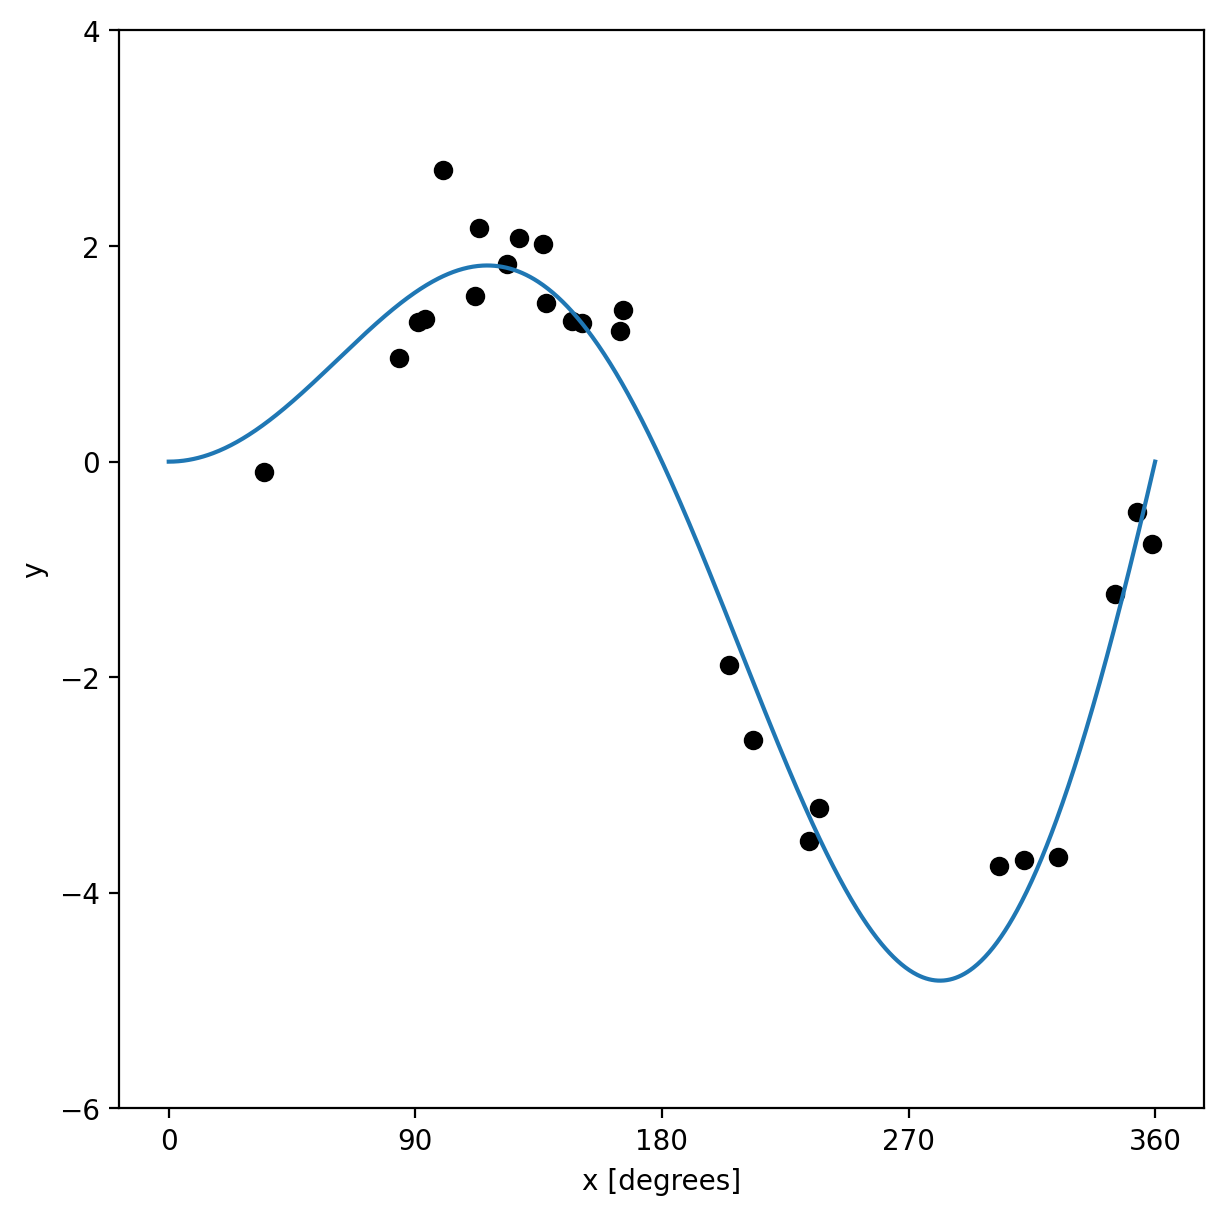

In [6]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_model,y_model)
ax.scatter(x_data,y_data,color='black')
ax.set_xlabel('x [degrees]')
ax.set_ylabel('y')
ax.set_xticks([0, np.pi/2, np.pi, 3/2*np.pi, 2*np.pi])
ax.set_xticklabels([0,90,180,270,360])
ax.set_yticks([-6,-4,-2,0,2,4])
plt.show()

## 6. Axis limits

Sometimes a plot's automatically chosen limits don't align with what you want. For example, in the above plot, the plot includes values below 0 degrees and above 360. Let's place a limit on the x-values (in the original units of radians since those match the values being input into the plot).

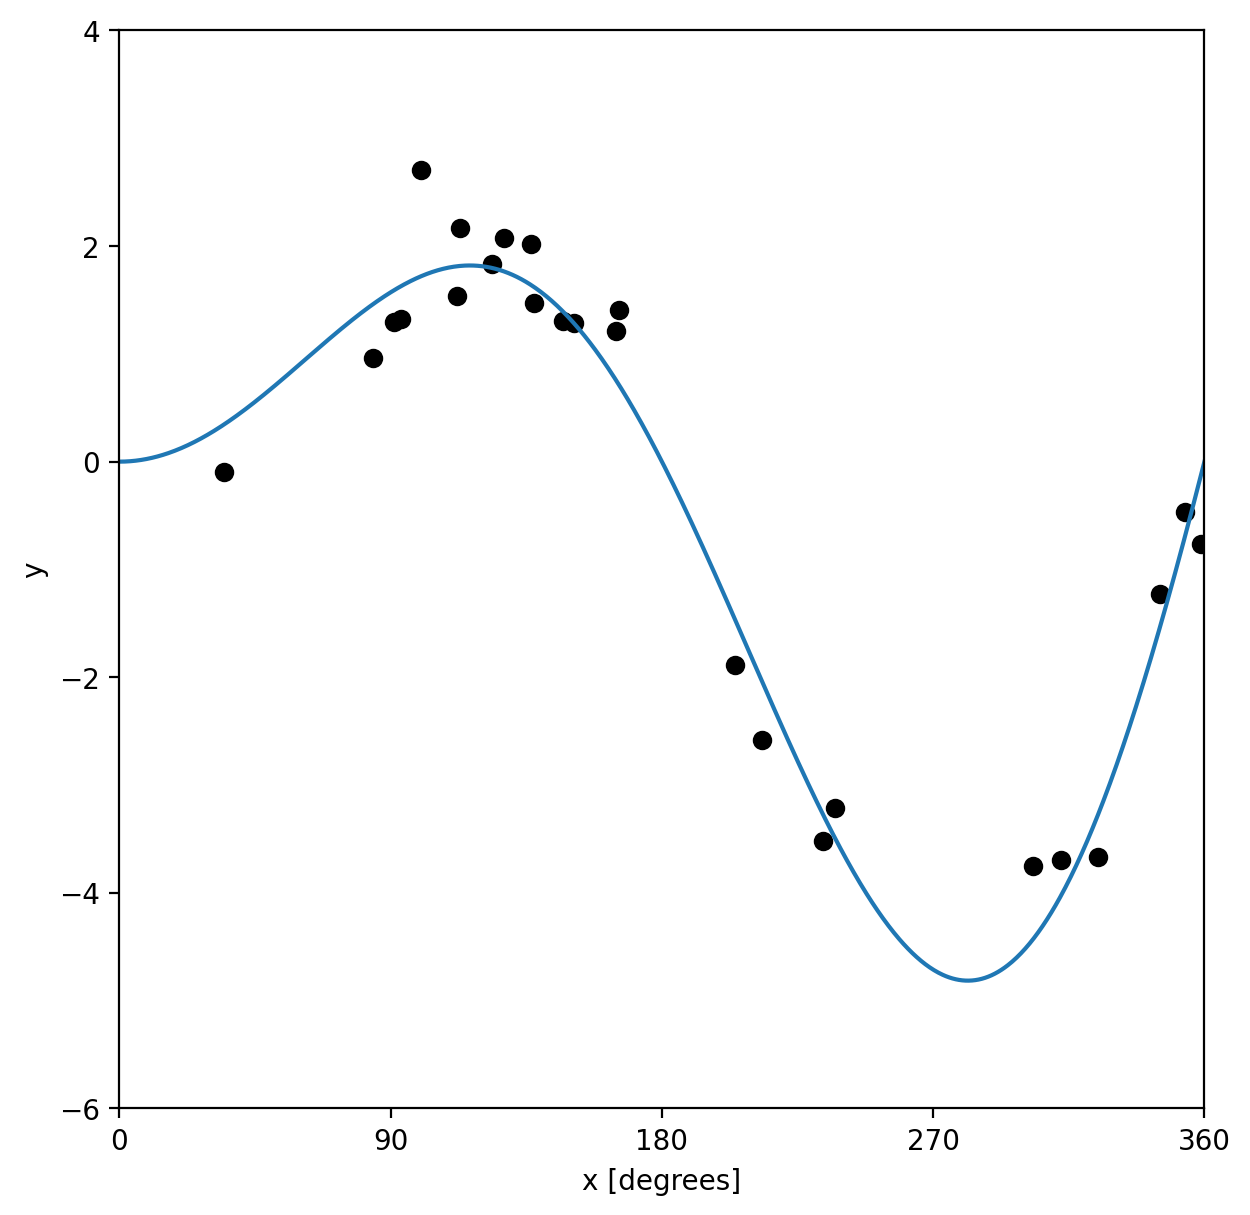

In [7]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_model,y_model)
ax.scatter(x_data,y_data,color='black')
ax.set_xlabel('x [degrees]')
ax.set_ylabel('y')
ax.set_xticks([0, np.pi/2, np.pi, 3/2*np.pi, 2*np.pi])
ax.set_xticklabels([0,90,180,270,360])
ax.set_yticks([-6,-4,-2,0,2,4])
ax.set_xlim([0,2*np.pi])
plt.show()

## 7. Grid lines

Adding a grid can often allow the plot to be more easily read. It's not necessary, but can be helpful for effective interpretation of the data.

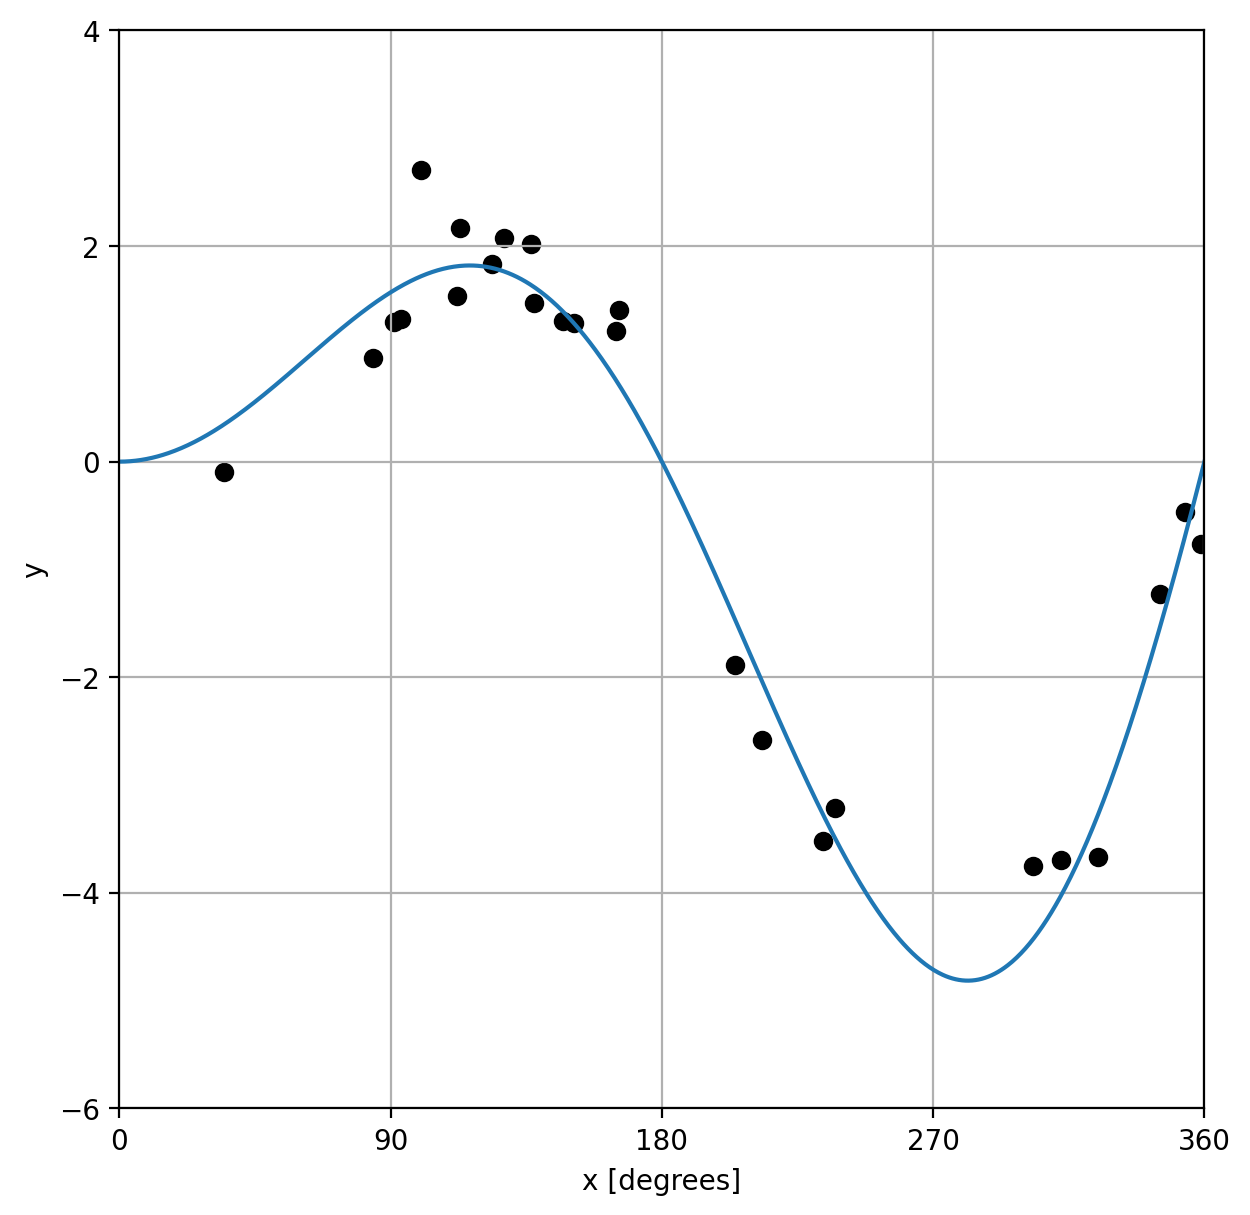

In [8]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_model,y_model)
ax.scatter(x_data,y_data,color='black')
ax.set_xlabel('x [degrees]')
ax.set_ylabel('y')
ax.set_xticks([0, np.pi/2, np.pi, 3/2*np.pi, 2*np.pi])
ax.set_xticklabels([0,90,180,270,360])
ax.set_yticks([-6,-4,-2,0,2,4])
ax.set_xlim([0,2*np.pi])
ax.grid(True)
plt.show()

# 8. Legend

Understanding our data is among the most important aspects of any plot and a legend is key to making that happen. To add a legend, we have to label each of the items that we're plotting, which is done most easily by adding a `label` keyword argument to the plotting method call. We'll call the line plot "Our Model" and the scatter plot data "Sample data".

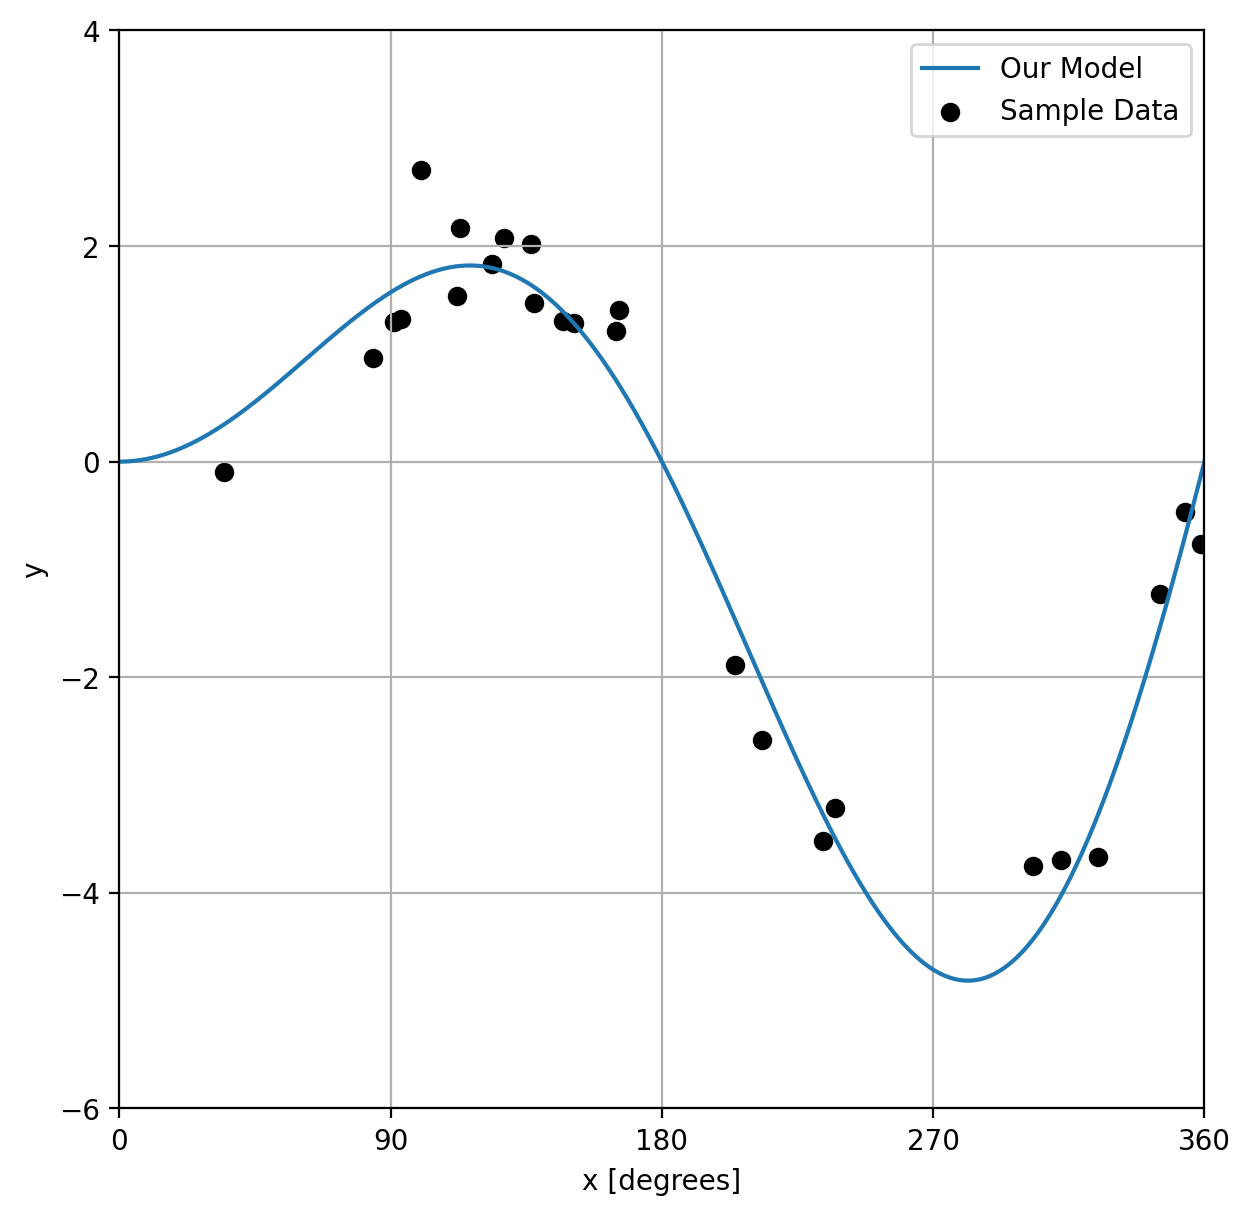

In [9]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_model,y_model, label="Our Model")
ax.scatter(x_data,y_data,color='black', label="Sample Data")
ax.set_xlabel('x [degrees]')
ax.set_ylabel('y')
ax.set_xticks([0, np.pi/2, np.pi, 3/2*np.pi, 2*np.pi])
ax.set_xticklabels([0,90,180,270,360])
ax.set_yticks([-6,-4,-2,0,2,4])
ax.set_xlim([0,2*np.pi])
ax.grid(True)
ax.legend()
plt.show()

## 9. Title

While a title can be added to any plot, it can be especially useful in subplots when you need to label each of the subplots to make sure it's clear what they represent. Let's add a title to our plot.

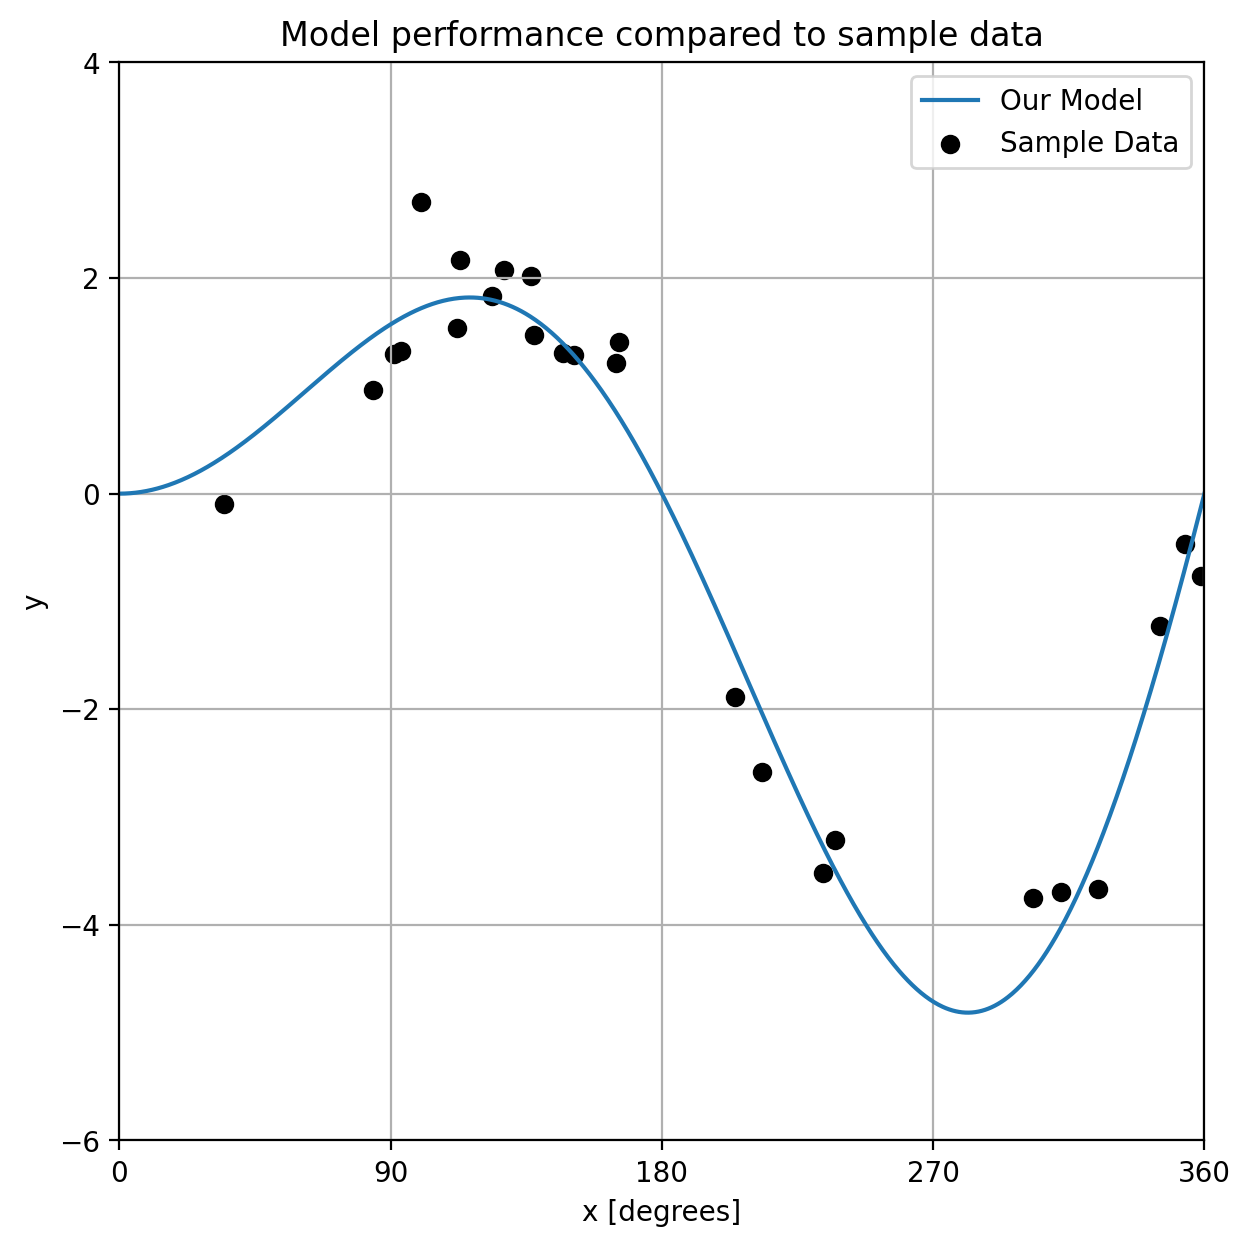

In [10]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_model,y_model, label="Our Model")
ax.scatter(x_data,y_data,color='black', label="Sample Data")
ax.set_xlabel('x [degrees]')
ax.set_ylabel('y')
ax.set_xticks([0, np.pi/2, np.pi, 3/2*np.pi, 2*np.pi])
ax.set_xticklabels([0,90,180,270,360])
ax.set_yticks([-6,-4,-2,0,2,4])
ax.set_xlim([0,2*np.pi])
ax.grid(True)
ax.legend()
ax.set_title('Model performance compared to sample data')
plt.show()

## 10. Spines

Spines are the lines that form the border of a set of axes. You can customize these by turning them on or off or adjusting their color pattern and other aspects of their style. Let's turn off the top and right spines to see this in action.

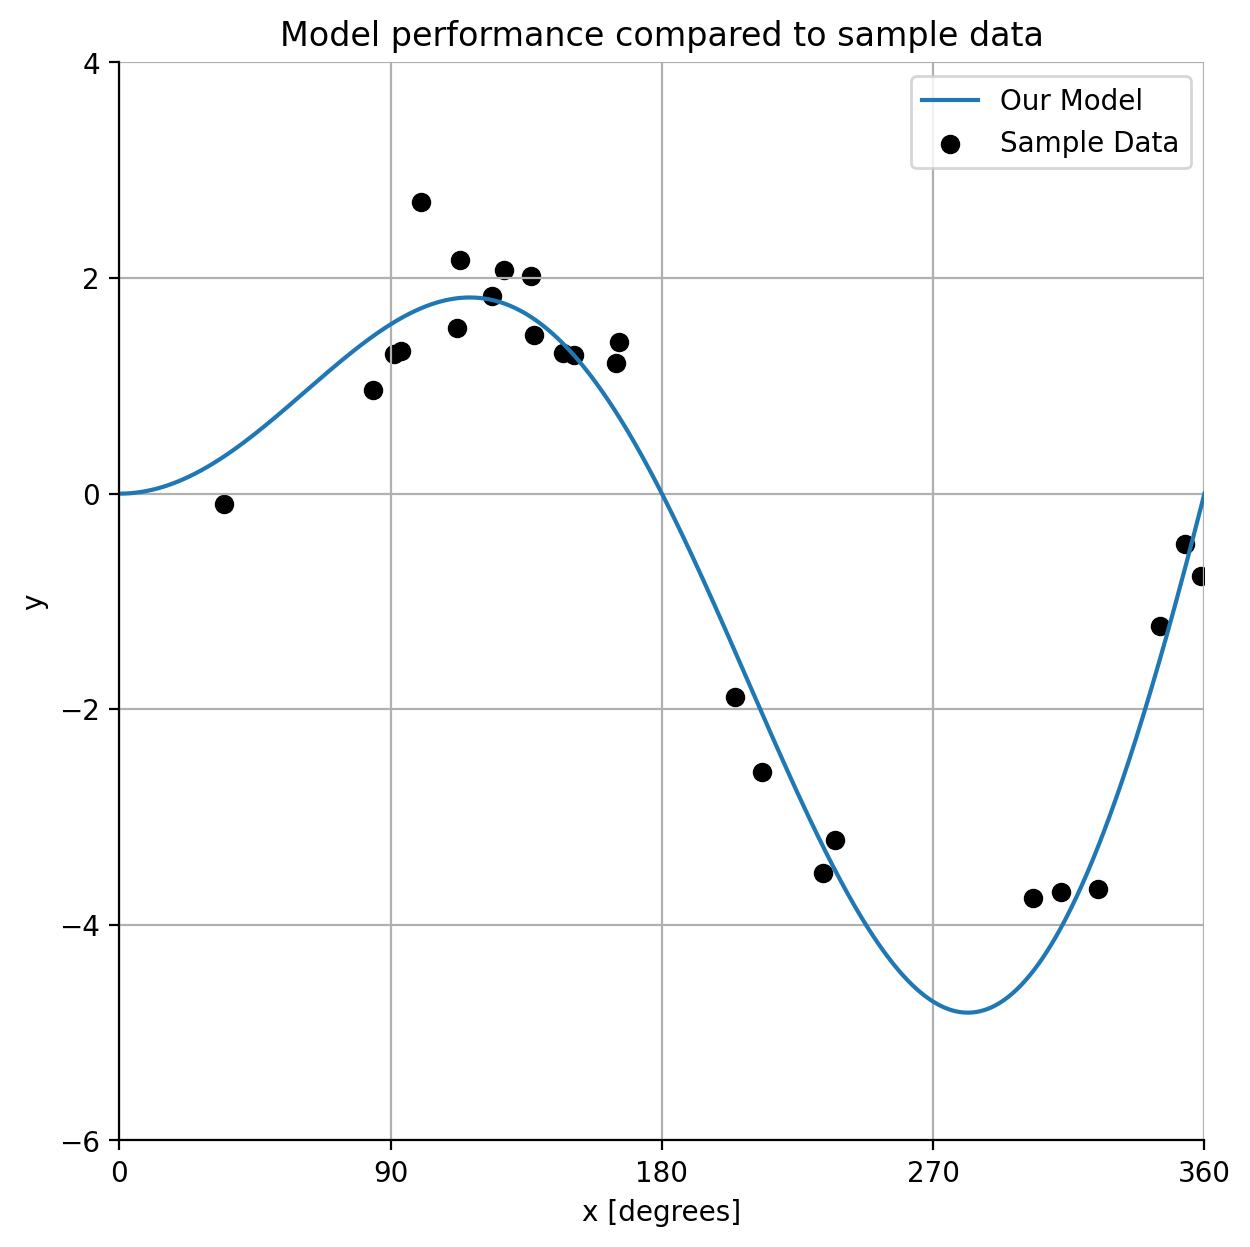

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_model,y_model, label="Our Model")
ax.scatter(x_data,y_data,color='black', label="Sample Data")
ax.set_xlabel('x [degrees]')
ax.set_ylabel('y')
ax.set_xticks([0, np.pi/2, np.pi, 3/2*np.pi, 2*np.pi])
ax.set_xticklabels([0,90,180,270,360])
ax.set_yticks([-6,-4,-2,0,2,4])
ax.set_xlim([0,2*np.pi])
ax.grid(True)
ax.legend()
ax.set_title('Model performance compared to sample data')
ax.spines[['right','top']].set_visible(False)
plt.show()

## Another way to set properties

Above, we used the individual set method for each property of the Axes object we wanted to change. For example `ax.set_ylabel('y')`. However, an alternative to this structure is to use the `ax.set()` method and set each property as a keyword property. For the y label example, this would be `ax.set(ylabel='y')`. And we can include multiple parameters that we wish to set. This notation can be more compact and easier to read:

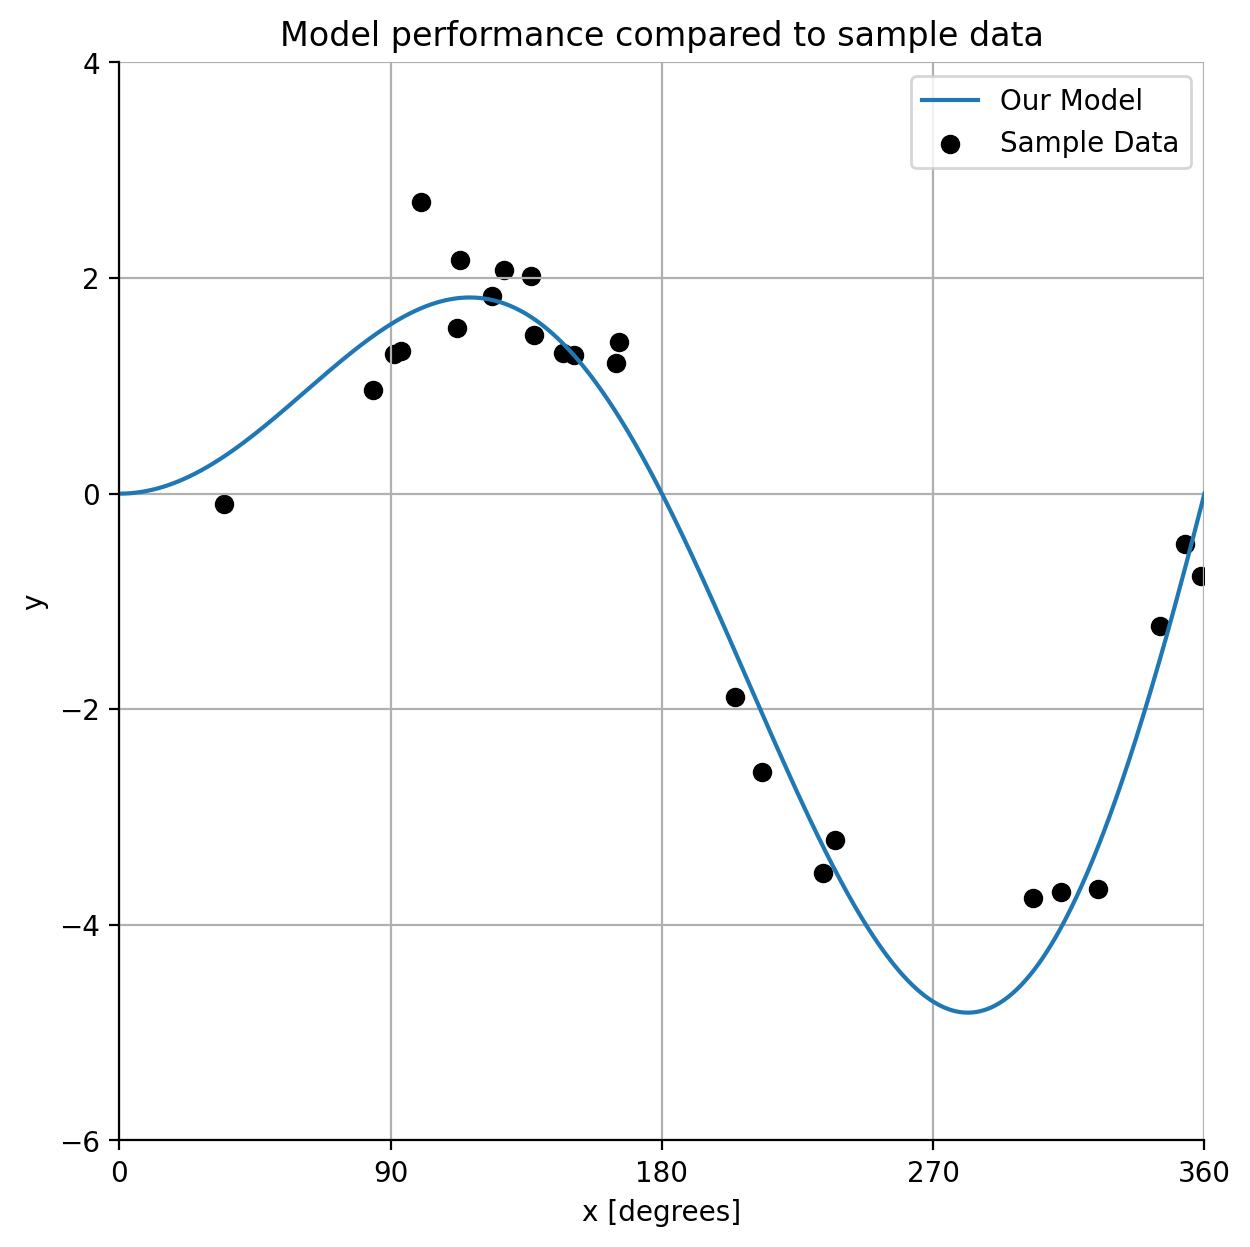

In [13]:


fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_model,y_model, label="Our Model")
ax.scatter(x_data,y_data,color='black', label="Sample Data")
ax.legend()
ax.spines[['right','top']].set_visible(False)
ax.grid(True)

ax.set(
    xlabel='x [degrees]',
    ylabel='y',
    xticks=[0, np.pi/2, np.pi, 3/2*np.pi, 2*np.pi],
    xticklabels=[0,90,180,270,360],
    yticks=[-6,-4,-2,0,2,4],
    xlim=[0,2*np.pi]
)

ax.set_title('Model performance compared to sample data')

plt.show()

There are many more ways we can customize plots, but these are some of the foundational concepts that you'll use again and again.